In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


## Imports

In [82]:
import os
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
## paths where datasets are located
enron1_train_ham_path = "//content//drive//MyDrive//project1_datasets//enron1_train//train//ham"
enron1_train_spam_path = "//content//drive//MyDrive//project1_datasets//enron1_train//train//spam"
enron1_test_ham_path = "//content//drive//MyDrive//project1_datasets//enron1_test//test//ham"
enron1_test_spam_path = "//content//drive//MyDrive//project1_datasets//enron1_test//test//spam"

enron2_train_ham_path = "//content//drive//MyDrive//project1_datasets//enron2_train//train//ham"
enron2_train_spam_path = "//content//drive//MyDrive//project1_datasets//enron2_train//train//spam"
enron2_test_ham_path = "//content//drive//MyDrive//project1_datasets//enron2_test//test//ham"
enron2_test_spam_path = "//content//drive//MyDrive//project1_datasets//enron2_test//test//spam"

enron4_train_ham_path = "//content//drive//MyDrive//project1_datasets//enron4_train//train//ham"
enron4_train_spam_path = "//content//drive//MyDrive//project1_datasets//enron4_train//train//spam"
enron4_test_ham_path = "//content//drive//MyDrive//project1_datasets//enron4_test//test//ham"
enron4_test_spam_path = "//content//drive//MyDrive//project1_datasets//enron4_test//test//spam"


## Creating the dataset

In [6]:
all_data = []

def create_dataset(path):
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            with open(path+"//"+filename, "rb") as f:
                all_data.append([f.read(), path.split("//")[-1]])

paths = [enron1_train_ham_path, enron1_train_spam_path, enron1_test_ham_path, enron1_test_spam_path, enron2_train_ham_path, enron2_train_spam_path, enron2_test_ham_path, enron2_test_spam_path, enron4_train_ham_path, enron4_train_spam_path, enron4_test_ham_path, enron4_test_spam_path]

for path in paths:
    create_dataset(path)

len(all_data)

2925

In [7]:
# creating each enron dataset
def create_individual_dataset(path, dataset):
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            with open(path+"//"+filename, "rb") as f:
                dataset.append([f.read(), path.split("//")[-1]])
    return dataset

"""For training"""
enron1_train_ham_df = []
enron1_train_ham_df = create_individual_dataset(enron1_train_ham_path, enron1_train_ham_df)
enron1_train_spam_df = []
enron1_train_spam_df = create_individual_dataset(enron1_train_spam_path, enron1_train_spam_df)

print(len(enron1_train_ham_df), len(enron1_train_spam_df))

enron2_train_ham_df = []
enron2_train_ham_df = create_individual_dataset(enron2_train_ham_path, enron2_train_ham_df)
enron2_train_spam_df = []
enron2_train_spam_df = create_individual_dataset(enron2_train_spam_path, enron2_train_spam_df)

print(len(enron2_train_ham_df), len(enron2_train_spam_df))

enron4_train_ham_df = []
enron4_train_ham_df = create_individual_dataset(enron4_train_ham_path, enron4_train_ham_df)
enron4_train_spam_df = []
enron4_train_spam_df = create_individual_dataset(enron4_train_spam_path, enron4_train_spam_df)

print(len(enron4_train_ham_df), len(enron4_train_spam_df))

"""For testing"""
enron1_test_ham_df = []
enron1_test_ham_df = create_individual_dataset(enron1_test_ham_path, enron1_test_ham_df)
enron1_test_spam_df = []
enron1_test_spam_df = create_individual_dataset(enron1_test_spam_path, enron1_test_spam_df)

print(len(enron1_test_ham_df), len(enron1_test_spam_df))

enron2_test_ham_df = []
enron2_test_ham_df = create_individual_dataset(enron2_test_ham_path, enron2_test_ham_df)
enron2_test_spam_df = []
enron2_test_spam_df = create_individual_dataset(enron2_test_spam_path, enron2_test_spam_df)

print(len(enron2_test_ham_df), len(enron2_test_spam_df))

enron4_test_ham_df = []
enron4_test_ham_df = create_individual_dataset(enron4_test_ham_path, enron4_test_ham_df)
enron4_test_spam_df = []
enron4_test_spam_df = create_individual_dataset(enron4_test_spam_path, enron4_test_spam_df)

print(len(enron4_test_ham_df), len(enron4_test_spam_df))

319 131
340 123
133 402
307 149
348 130
152 391


In [8]:
"""Converting string to byte string"""

def convert_to_str(data):
    converted_data = []
    for item in data:
        if isinstance(item[0], bytes):
            # If the item is in bytes, decode it to a string
            converted_data.append([item[0].decode('utf-8', errors='ignore'), item[1]])
        else:
            # If the item is already a string, just append it
                 converted_data.append([item[0], item[1]])
    return converted_data


all_data = convert_to_str(all_data)

In [9]:
enron1_train_ham_df = convert_to_str(enron1_train_ham_df)
enron1_train_spam_df = convert_to_str(enron1_train_spam_df)
enron2_train_ham_df = convert_to_str(enron2_train_ham_df)
enron2_train_spam_df = convert_to_str(enron2_train_spam_df)
enron4_train_ham_df = convert_to_str(enron4_train_ham_df)
enron4_train_spam_df = convert_to_str(enron4_train_spam_df)

enron1_test_ham_df = convert_to_str(enron1_test_ham_df)
enron1_test_spam_df = convert_to_str(enron1_test_spam_df)
enron2_test_ham_df = convert_to_str(enron2_test_ham_df)
enron2_test_spam_df = convert_to_str(enron2_test_spam_df)
enron4_test_ham_df = convert_to_str(enron4_test_ham_df)
enron4_test_spam_df = convert_to_str(enron4_test_spam_df)

In [10]:
enron1_train_spam_df.extend(enron1_train_ham_df)
enron1_train = enron1_train_spam_df
print(len(enron1_train))

enron2_train_spam_df.extend(enron2_train_ham_df)
enron2_train = enron2_train_spam_df
print(len(enron2_train))

enron4_train_spam_df.extend(enron4_train_ham_df)
enron4_train = enron4_train_spam_df
print(len(enron4_train))

enron1_test_spam_df.extend(enron1_test_ham_df)
enron1_test = enron1_test_spam_df
print(len(enron1_test))

enron2_test_spam_df.extend(enron2_test_ham_df)
enron2_test = enron2_test_spam_df
print(len(enron2_test))

enron4_test_spam_df.extend(enron4_test_ham_df)
enron4_test = enron4_test_spam_df
print(len(enron4_test))

450
463
535
456
478
543


## Convert list to Pandas Dataframe

In [11]:
def convert_to_df(data):
    df = pd.DataFrame(data, columns=['Email', 'Type'])
    print(df.shape)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

all_data_df = convert_to_df(all_data)

enron1_train_df = convert_to_df(enron1_train)
enron2_train_df = convert_to_df(enron2_train)
enron4_train_df = convert_to_df(enron4_train)

enron1_test_df = convert_to_df(enron1_test)
enron2_test_df = convert_to_df(enron2_test)
enron4_test_df = convert_to_df(enron4_test)

(2925, 2)
(450, 2)
(463, 2)
(535, 2)
(456, 2)
(478, 2)
(543, 2)


In [12]:
copy_of_enron1_train_df = convert_to_df(enron1_train)
copy_of_enron2_train_df = convert_to_df(enron2_train)
copy_of_enron4_train_df = convert_to_df(enron4_train)

copy_of_enron1_test_df = convert_to_df(enron1_test)
copy_of_enron2_test_df = convert_to_df(enron2_test)
copy_of_enron4_test_df = convert_to_df(enron4_test)

(450, 2)
(463, 2)
(535, 2)
(456, 2)
(478, 2)
(543, 2)


## Preprocessing the data

For preprocessing the data, I have performed the following operations -

- Converting text to lower case

- Rmoving punctuations

- Creating word tokens

- Removing stop words

- Lemmatization

- Removing non alphabetic character

**For this project I have used the Natural Language Toolkit (NLTK) library**

In [13]:
def preprocess(text):
    # conver to lowercase
    text = text.lower()

    # remove punctuations
    text = text.translate(str.maketrans('','', string.punctuation))

    # tokenization
    tokens = word_tokenize(text)

    # stop word removal
    stop_words = set(stopwords.words("english"))
    filtered = [word for word in tokens if word.lower() not in stop_words]

    # lemmatization
    lemma = WordNetLemmatizer()
    filtered = [lemma.lemmatize(word) for word in filtered]

    # remove non-alphabetic characters
    filtered = [word for word in filtered if word.isalpha()]

    return filtered

## Applying the function to Email column
all_data_df['Email_tok'] = all_data_df['Email'].apply(preprocess)

enron1_train_df['Email_tok'] = enron1_train_df['Email'].apply(preprocess)
enron2_train_df['Email_tok'] = enron2_train_df['Email'].apply(preprocess)
enron4_train_df['Email_tok'] = enron4_train_df['Email'].apply(preprocess)

enron1_test_df['Email_tok'] = enron1_test_df['Email'].apply(preprocess)
enron2_test_df['Email_tok'] = enron2_test_df['Email'].apply(preprocess)
enron4_test_df['Email_tok'] = enron4_test_df['Email'].apply(preprocess)


In [14]:
all_data_df['Email_str'] = all_data_df['Email_tok'].apply(lambda x: ' '.join(x))

enron1_train_df['Email_str'] = enron1_train_df['Email_tok'].apply(lambda x: ' '.join(x))
enron2_train_df['Email_str'] = enron2_train_df['Email_tok'].apply(lambda x: ' '.join(x))
enron4_train_df['Email_str'] = enron4_train_df['Email_tok'].apply(lambda x: ' '.join(x))

enron1_test_df['Email_str'] = enron1_test_df['Email_tok'].apply(lambda x: ' '.join(x))
enron2_test_df['Email_str'] = enron2_test_df['Email_tok'].apply(lambda x: ' '.join(x))
enron4_test_df['Email_str'] = enron4_test_df['Email_tok'].apply(lambda x: ' '.join(x))

In [15]:
enron1_train_df

,Email,Type,Email_tok,Email_str
0,Subject: re : formosa meter # : 1000\r\nthe de...,ham,"[subject, formosa, meter, deal, continue, mont...",subject formosa meter deal continue month past...
1,Subject: dec 2000 prod : panther pipeline dema...,ham,"[subject, dec, prod, panther, pipeline, demand...",subject dec prod panther pipeline demand charg...
2,"Subject: mobil beaumont - may 2001\r\ndaren ,\...",ham,"[subject, mobil, beaumont, may, daren, want, c...",subject mobil beaumont may daren want confirm ...
3,Subject: aol instant messenger reconfirmation\...,ham,"[subject, aol, instant, messenger, reconfirmat...",subject aol instant messenger reconfirmation t...
4,Subject: credit watch list - - week of 11 / 5 ...,ham,"[subject, credit, watch, list, week, attached,...",subject credit watch list week attached revise...
...,...,...,...,...
445,Subject: correction to 4 / 4 & 4 / 5 nominatio...,ham,"[subject, correction, nomination, eastrans, re...",subject correction nomination eastrans result ...
446,Subject: re : noms / actual flow for 4 / 01 / ...,ham,"[subject, noms, actual, flow, agree, april, ei...",subject noms actual flow agree april eileen po...
447,"Subject: hpl nom for march 28 , 2000\r\n( see ...",ham,"[subject, hpl, nom, march, see, attached, file...",subject hpl nom march see attached file hplo x...
448,Subject: playful asian cutie !\r\nthis damn se...,spam,"[subject, playful, asian, cutie, damn, sexy, c...",subject playful asian cutie damn sexy cutie wa...


In [ ]:
all_results_accuracy = {}
all_results_recall = {}
all_results_f1 = {}

## Multinomial Naive Bayes using Bag of Words

### Scikit-learn approach

In [ ]:
def predict_type(X_train, X_test, name):
    y_train = X_train['Type']
    y_test = X_test['Type']

    vectorizer = CountVectorizer()

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    model = MultinomialNB(alpha=1.0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1


accuracy, recall, f1 = predict_type(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['sklearn_bow_enron1'] = accuracy
all_results_recall['sklearn_bow_enron1'] = recall
all_results_f1['sklearn_bow_enron1'] = f1

accuracy, recall, f1 = predict_type(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['sklearn_bow_enron2'] = accuracy
all_results_recall['sklearn_bow_enron2'] = recall
all_results_f1['sklearn_bow_enron2'] = f1

accuracy, recall, f1 = predict_type(enron4_train_df, enron4_test_df, 'enron4')
all_results_accuracy['sklearn_bow_enron4'] = accuracy
all_results_recall['sklearn_bow_enron4'] = recall
all_results_f1['sklearn_bow_enron4'] = f1

print(all_results_accuracy)
print(all_results_recall)
print(all_results_f1)


enron1
accuracy - 0.9298245614035088
recall - 0.8657718120805369
f1 score - 0.8896551724137931
              precision    recall  f1-score   support

         ham       0.94      0.96      0.95       307
        spam       0.91      0.87      0.89       149

    accuracy                           0.93       456
   macro avg       0.93      0.91      0.92       456
weighted avg       0.93      0.93      0.93       456

----------------------------------------------------------------------------------
enron2
accuracy - 0.9456066945606695
recall - 0.8769230769230769
f1 score - 0.8976377952755904
              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       348
        spam       0.92      0.88      0.90       130

    accuracy                           0.95       478
   macro avg       0.94      0.92      0.93       478
weighted avg       0.95      0.95      0.95       478

-------------------------------------------------------------------------

### Step by step approach

In [ ]:
import numpy as np

# Function to train Multinomial Naive Bayes
def train_multinomial_naive_bayes(df):
    cond_prob_ham = {}
    cond_prob_spam = {}

    """Extracting vocabulary"""
    vocabulary = set()
    for email in df['Email_str']:  # Iterate over each email
        tokens = email.split()  # Split each email into words
        vocabulary.update(tokens)  # Add tokens to the vocabulary
    vocabulary = list(vocabulary)

    """Counting the number of emails in each class"""
    ham_docs = df[df['Type'] == 'ham'].shape[0]
    spam_docs = df[df['Type'] == 'spam'].shape[0]
    total_docs = df.shape[0]

    """Join the text of emails belonging to the same class"""
    text_ham = " ".join(df[df['Type'] == 'ham']['Email_str'].astype(str))
    text_spam = " ".join(df[df['Type'] == 'spam']['Email_str'].astype(str))

    """Calculating priors"""
    prior_ham = ham_docs / total_docs
    prior_spam = spam_docs / total_docs

    """Count tokens in ham and spam classes"""
    tokens_in_ham = sum(text_ham.split().count(term) for term in vocabulary)
    tokens_in_spam = sum(text_spam.split().count(term) for term in vocabulary)

    """Calculating conditional probabilities"""
    for term in vocabulary:
        tct_ham = text_ham.split().count(term)
        cond_prob_ham[term] = (tct_ham + 1.0) / (tokens_in_ham + len(vocabulary))

        tct_spam = text_spam.split().count(term)
        cond_prob_spam[term] = (tct_spam + 1.0) / (tokens_in_spam + len(vocabulary))

    return vocabulary, cond_prob_spam, cond_prob_ham, prior_ham, prior_spam

# Function to classify emails using the trained model
def apply_mnb(prior_ham, prior_spam, vocabulary, email, cond_prob_ham, cond_prob_spam):
    tokens = email.split()
    scores = {'ham': np.log(prior_ham), 'spam': np.log(prior_spam)}  # Log priors

    for token in tokens:
        if token in cond_prob_ham:
            scores['ham'] += np.log(cond_prob_ham[token])
        else:
            scores['ham'] += np.log(1 / (sum(cond_prob_ham.get(t, 0) for t in vocabulary) + len(vocabulary)))

        if token in cond_prob_spam:
            scores['spam'] += np.log(cond_prob_spam[token])
        else:
            scores['spam'] += np.log(1 / (sum(cond_prob_spam.get(t, 0) for t in vocabulary) + len(vocabulary)))

    return max(scores, key=scores.get)

# Function to classify and evaluate test documents
def funct(train_df, test_df, name):
    # Train the Multinomial Naive Bayes model
    vocabulary, cond_prob_spam, cond_prob_ham, prior_ham, prior_spam = train_multinomial_naive_bayes(train_df)

    # Classify test documents
    results = []
    for email in test_df['Email_str']:
        results.append(apply_mnb(prior_ham, prior_spam, vocabulary, email, cond_prob_ham, cond_prob_spam))

    # Evaluate the predictions
    correct_predictions = sum(pred == true for pred, true in zip(results, test_df['Type']))
    accuracy_score = correct_predictions / len(results)
    recall = recall_score(test_df['Type'], results, pos_label='spam')
    f1 = f1_score(test_df['Type'], results, pos_label='spam')

    # Print the results
    print(name)
    print(f"Accuracy = {accuracy_score * 100}%")
    print("Recall = ", recall)
    print("F1 = ", f1)
    print("-----------------------------------------------------------")

    return accuracy, recall, f1

# Example usage with datasets
accuracy_e1, recall_e1, f1_e1 = funct(enron1_train_df, enron1_test_df, 'enron1')
accuracy_e2, recall_e2, f1_e2 = funct(enron2_train_df, enron2_test_df, 'enron2')
accuracy_e4, recall_e4, f1_e4 = funct(enron4_train_df, enron4_test_df, 'enron4')


enron1
Accuracy = 93.2017543859649%
Recall =  0.87248322147651
F1 =  0.8934707903780068
-----------------------------------------------------------
enron2
Accuracy = 94.35146443514645%
Recall =  0.8769230769230769
F1 =  0.8941176470588236
-----------------------------------------------------------
enron4
Accuracy = 97.23756906077348%
Recall =  0.9948849104859335
F1 =  0.9810844892812105
-----------------------------------------------------------


In [ ]:
all_results_accuracy['step_by_step_bow_enron1'] = accuracy_e1
all_results_accuracy['step_by_step_bow_enron2'] = accuracy_e2
all_results_accuracy['step_by_step_bow_enron4'] = accuracy_e4

all_results_recall['step_by_step_bow_enron1'] = recall_e1
all_results_recall['step_by_step_bow_enron2'] = recall_e2
all_results_recall['step_by_step_bow_enron4'] = recall_e4

all_results_f1['step_by_step_bow_enron1'] = f1_e1
all_results_f1['step_by_step_bow_enron2'] = f1_e2
all_results_f1['step_by_step_bow_enron4'] = f1_e4

In [ ]:
all_results_accuracy

{'sklearn_bow_enron1': 0.9298245614035088,
 'sklearn_bow_enron2': 0.9456066945606695,
 'sklearn_bow_enron4': 0.9742173112338858,
 'step_by_step_bow_enron1': 0.9742173112338858,
 'step_by_step_bow_enron2': 0.9742173112338858,
 'step_by_step_bow_enron4': 0.9742173112338858}

## Bernoulli Naive Bayes

### Scikit learn approach

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

def predict_type(X_train, X_test, name):
    y_train = X_train['Type']

    vectorizer = CountVectorizer(binary=True, stop_words=None)  # Ensure not filtering out all words

    X_train_text = vectorizer.fit_transform(X_train['Email_str'])

    model = BernoulliNB(alpha=1.0)
    model.fit(X_train_text, y_train)

    y_test = X_test['Type']
    X_test_text = vectorizer.transform(X_test['Email_str'])

    y_pred = model.predict(X_test_text)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1

# Example usage with your dataframes
sklearn_bern_acc_e1, sklearn_bern_recall_e1, sklearn_bern_f1_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1')
sklearn_bern_acc_e2, sklearn_bern_recall_e2, sklearn_bern_f1_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2')
sklearn_bern_acc_e4, sklearn_bern_recall_e4, sklearn_bern_f1_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4')


enron1
accuracy - 0.7302631578947368
recall - 0.2080536912751678
f1 score - 0.3351351351351351
              precision    recall  f1-score   support

         ham       0.72      0.98      0.83       307
        spam       0.86      0.21      0.34       149

    accuracy                           0.73       456
   macro avg       0.79      0.60      0.58       456
weighted avg       0.77      0.73      0.67       456

----------------------------------------------------------------------------------
enron2
accuracy - 0.7782426778242678
recall - 0.2076923076923077
f1 score - 0.3375
              precision    recall  f1-score   support

         ham       0.77      0.99      0.87       348
        spam       0.90      0.21      0.34       130

    accuracy                           0.78       478
   macro avg       0.84      0.60      0.60       478
weighted avg       0.81      0.78      0.72       478

----------------------------------------------------------------------------------
en

In [ ]:
all_results_accuracy['sklearn_bern_enron1'] = sklearn_bern_acc_e1
all_results_accuracy['sklearn_bern_enron2'] = sklearn_bern_acc_e2
all_results_accuracy['sklearn_bern_enron4'] = sklearn_bern_acc_e4

all_results_recall['sklearn_bern_enron1'] = sklearn_bern_recall_e1
all_results_recall['sklearn_bern_enron2'] = sklearn_bern_recall_e2
all_results_recall['sklearn_bern_enron4'] = sklearn_bern_recall_e4

all_results_f1['sklearn_bern_enron1'] = sklearn_bern_f1_e1
all_results_f1['sklearn_bern_enron2'] = sklearn_bern_f1_e2
all_results_f1['sklearn_bern_enron4'] = sklearn_bern_f1_e4

### Step by step approach

In [ ]:
import numpy as np
from sklearn.metrics import recall_score, f1_score

# Function to train Bernoulli Naive Bayes
def train_bernoulli_naive_bayes(df):
    cond_prob_ham = {}
    cond_prob_spam = {}

    """Extracting vocabulary"""
    vocabulary = set()
    for email in df['Email_str']:  # Iterate over each email
        tokens = email.split()  # Split each email into words
        vocabulary.update(tokens)  # Add tokens to the vocabulary
    vocabulary = list(vocabulary)

    """Counting the number of emails in each class"""
    ham_docs = df[df['Type'] == 'ham'].shape[0]
    spam_docs = df[df['Type'] == 'spam'].shape[0]
    total_docs = df.shape[0]

    """Join the text of emails belonging to the same class"""
    ham_emails = df[df['Type'] == 'ham']['Email_str'].astype(str)
    spam_emails = df[df['Type'] == 'spam']['Email_str'].astype(str)

    """Calculating priors"""
    prior_ham = ham_docs / total_docs
    prior_spam = spam_docs / total_docs

    """Calculating conditional probabilities (Bernoulli approach)"""
    for term in vocabulary:
        # For ham class: P(term|ham)
        ham_with_term = sum(1 for email in ham_emails if term in email.split())
        cond_prob_ham[term] = (ham_with_term + 1.0) / (ham_docs + 2.0)  # Laplace smoothing

        # For spam class: P(term|spam)
        spam_with_term = sum(1 for email in spam_emails if term in email.split())
        cond_prob_spam[term] = (spam_with_term + 1.0) / (spam_docs + 2.0)  # Laplace smoothing

    return vocabulary, cond_prob_spam, cond_prob_ham, prior_ham, prior_spam

# Function to classify emails using the trained Bernoulli Naive Bayes model
def apply_bnb(prior_ham, prior_spam, vocabulary, email, cond_prob_ham, cond_prob_spam):
    tokens = set(email.split())  # Consider unique tokens for Bernoulli
    scores = {'ham': np.log(prior_ham), 'spam': np.log(prior_spam)}  # Log priors

    for term in vocabulary:
        if term in tokens:
            scores['ham'] += np.log(cond_prob_ham[term])
            scores['spam'] += np.log(cond_prob_spam[term])
        else:
            scores['ham'] += np.log(1 - cond_prob_ham[term])
            scores['spam'] += np.log(1 - cond_prob_spam[term])

    return max(scores, key=scores.get)

# Function to classify and evaluate test documents
def funct(train_df, test_df, name):
    # Train the Bernoulli Naive Bayes model
    vocabulary, cond_prob_spam, cond_prob_ham, prior_ham, prior_spam = train_bernoulli_naive_bayes(train_df)

    # Classify test documents
    results = []
    for email in test_df['Email_str']:
        results.append(apply_bnb(prior_ham, prior_spam, vocabulary, email, cond_prob_ham, cond_prob_spam))

    # Evaluate the predictions
    correct_predictions = sum(pred == true for pred, true in zip(results, test_df['Type']))
    accuracy_score = correct_predictions / len(results)
    recall = recall_score(test_df['Type'], results, pos_label='spam')
    f1 = f1_score(test_df['Type'], results, pos_label='spam')

    # Print the results
    print(name)
    print(f"Accuracy = {accuracy_score * 100}%")
    print("Recall = ", recall)
    print("F1 = ", f1)
    print("-----------------------------------------------------------")

    return accuracy_score, recall, f1

# Example usage with datasets
accuracy_e1, recall_e1, f1_e1 = funct(enron1_train_df, enron1_test_df, 'enron1')
accuracy_e2, recall_e2, f1_e2 = funct(enron2_train_df, enron2_test_df, 'enron2')
accuracy_e4, recall_e4, f1_e4 = funct(enron4_train_df, enron4_test_df, 'enron4')


enron1
Accuracy = 73.02631578947368%
Recall =  0.2080536912751678
F1 =  0.3351351351351351
-----------------------------------------------------------
enron2
Accuracy = 77.82426778242679%
Recall =  0.2076923076923077
F1 =  0.3375
-----------------------------------------------------------
enron4
Accuracy = 91.71270718232044%
Recall =  1.0
F1 =  0.9455864570737605
-----------------------------------------------------------


In [ ]:
all_results_accuracy['step_by_step_bern_enron1'] = accuracy_e1
all_results_accuracy['step_by_step_bern_enron2'] = accuracy_e2
all_results_accuracy['step_by_step_bern_enron4'] = accuracy_e4

all_results_f1['step_by_step_bern_enron1'] = f1_e1
all_results_f1['step_by_step_bern_enron2'] = f1_e2
all_results_f1['step_by_step_bern_enron4'] = f1_e4

all_results_recall['step_by_step_bern_enron1'] = recall_e1
all_results_recall['step_by_step_bern_enron2'] = recall_e2
all_results_recall['step_by_step_bern_enron4'] = recall_e4

## Logistic Regression

### Scikit learn approach BoW

In [ ]:
def predict_type(X_train, X_test, name):
    y = X_train['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = LogisticRegression()
    lambda_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
    grid_search = GridSearchCV(model, lambda_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    new_model = LogisticRegression(C=best_C)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    # X_test['Email_str'] = X_test['Email'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = new_model.predict(X_test)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1

sklearn_lr_acc_e1, sklearn_lr_recall_e1, sklearn_lr_f1_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1')
sklearn_lr_acc_e2, sklearn_lr_recall_e2, sklearn_lr_f1_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2')
sklearn_lr_acc_e4, sklearn_lr_recall_e4, sklearn_lr_f1_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4')

enron1
accuracy - 0.9517543859649122
recall - 0.959731543624161
f1 score - 0.9285714285714286
              precision    recall  f1-score   support

         ham       0.98      0.95      0.96       307
        spam       0.90      0.96      0.93       149

    accuracy                           0.95       456
   macro avg       0.94      0.95      0.95       456
weighted avg       0.95      0.95      0.95       456

----------------------------------------------------------------------------------
enron2
accuracy - 0.9539748953974896
recall - 0.9076923076923077
f1 score - 0.9147286821705427
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       348
        spam       0.92      0.91      0.91       130

    accuracy                           0.95       478
   macro avg       0.94      0.94      0.94       478
weighted avg       0.95      0.95      0.95       478

--------------------------------------------------------------------------

### Hyperparameter Tuning LR (BoW)

In [83]:
import pandas as pd

def predict_type(X_train, X_test, name, params):
    y = X_train['Type']

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = LogisticRegression(**params)
    model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    return accuracy, recall, f1, precision

results = []

parameters = [
    {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False},
    {'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False},
    {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True},
    {'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True}
]

for params in parameters:
    acc_e1, recall_e1, f1_e1, precision_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1', params)
    results.append(['enron1', params, acc_e1, recall_e1, f1_e1, precision_e1])

    acc_e2, recall_e2, f1_e2, precision_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2', params)
    results.append(['enron2', params, acc_e2, recall_e2, f1_e2, precision_e2])

    acc_e4, recall_e4, f1_e4, precision_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4', params)
    results.append(['enron4', params, acc_e4, recall_e4, f1_e4, precision_e4])

pd.set_option('display.max_colwidth', None)
df_results = pd.DataFrame(results, columns=['Dataset', 'Parameters', 'Accuracy', 'Recall', 'F1 Score', 'Precision Score'])

df_results


,Dataset,Parameters,Accuracy,Recall,F1 Score,Precision Score
0,enron1,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.942982,0.926174,0.913907,0.901961
1,enron2,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.926778,0.792308,0.854772,0.927928
2,enron4,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.955801,1.000000,0.970223,0.942169
3,enron1,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.942982,0.926174,0.913907,0.901961
4,enron2,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.926778,0.792308,0.854772,0.927928
5,enron4,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.955801,1.000000,0.970223,0.942169
6,enron1,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.942982,0.926174,0.913907,0.901961
7,enron2,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.920502,0.769231,0.840336,0.925926
8,enron4,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.942910,1.000000,0.961870,0.926540
9,enron1,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True}",0.947368,0.932886,0.920530,0.908497


## Hyperparameter Tuning LR (Bernoulli)

In [84]:
import pandas as pd

def predict_type(X_train, X_test, name, params):
    y = X_train['Type']

    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = LogisticRegression(**params)
    model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    return accuracy, recall, f1, precision

results = []

parameters = [
    {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False},
    {'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False},
    {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True},
    {'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True}
]

for params in parameters:
    acc_e1, recall_e1, f1_e1, precision_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1', params)
    results.append(['enron1', params, acc_e1, recall_e1, f1_e1, precision_e1])

    acc_e2, recall_e2, f1_e2, precision_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2', params)
    results.append(['enron2', params, acc_e2, recall_e2, f1_e2, precision_e2])

    acc_e4, recall_e4, f1_e4, precision_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4', params)
    results.append(['enron4', params, acc_e4, recall_e4, f1_e4, precision_e4])

pd.set_option('display.max_colwidth', None)
df_results = pd.DataFrame(results, columns=['Dataset', 'Parameters', 'Accuracy', 'Recall', 'F1 Score', 'Precision Score'])

df_results


,Dataset,Parameters,Accuracy,Recall,F1 Score,Precision Score
0,enron1,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.945175,0.872483,0.912281,0.955882
1,enron2,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.903766,0.715385,0.801724,0.911765
2,enron4,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.950276,1.000000,0.966625,0.935407
3,enron1,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.945175,0.872483,0.912281,0.955882
4,enron2,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.903766,0.715385,0.801724,0.911765
5,enron4,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.950276,1.000000,0.966625,0.935407
6,enron1,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.942982,0.865772,0.908451,0.955556
7,enron2,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.887029,0.653846,0.758929,0.904255
8,enron4,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.946593,1.000000,0.964242,0.930952
9,enron1,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True}",0.936404,0.852349,0.897527,0.947761


### step by step approach BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return (np.exp(z)) / (1 + np.exp(z))

# MCAP Logistic Regression training with L2 Regularization
def train_mcap_logistic_regression(X, y, learning_rate=0.01, lambda_=0.1, iterations=2000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # Initialize weights to zero
    bias = 0  # Initialize bias

    for _ in range(iterations):
        # Compute linear combination
        z = np.dot(X, weights) + bias

        # Compute predicted probabilities
        predictions = sigmoid(z)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (predictions - y)) + lambda_ * weights
        db = (1 / n_samples) * np.sum(predictions - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Predict function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return [1 if p > 0.5 else 0 for p in predictions]

def logistic_regression(train, test, name):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train['Email_str']).toarray()
    y = train['Type'].values

    # Label encoding for the target variable
    le = LabelEncoder()
    y = le.fit_transform(y)  # Convert 'ham' and 'spam' to 0 and 1

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
    best_lambda = lambdas[0]
    best_accuracy = 0

    for lambda_ in lambdas:
        weights, bias = train_mcap_logistic_regression(X_train, y_train, learning_rate=0.01, lambda_=lambda_, iterations=2000)

        y_val_pred = predict(X_val, weights, bias)
        accuracy = accuracy_score(y_val, y_val_pred)

        print(f"λ: {lambda_}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lambda = lambda_

    print(f"Best λ: {best_lambda}")

    # Test data
    X_test = vectorizer.transform(test['Email_str']).toarray()
    y_test = test['Type'].values
    y_test = le.transform(y_test)  # Encode test labels as 0 and 1

    weights, bias = train_mcap_logistic_regression(X, y, learning_rate=0.01, lambda_=best_lambda, iterations=2000)

    y_test_pred = predict(X_test, weights, bias)

    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, pos_label=1)  # 1 represents 'spam'
    f1 = f1_score(y_test, y_test_pred, pos_label=1)

    # Print the results
    print(name)
    print(f"Accuracy = {accuracy * 100}%")
    print("Recall = ", recall)
    print("F1 = ", f1)
    print("-----------------------------------------------------------")

    return accuracy, recall, f1

# Example usage with datasets
accuracy_score_e1, recall_e1, f1_e1 = logistic_regression(enron1_train_df, enron1_test_df, 'enron1')
accuracy_score_e2, recall_e2, f1_e2 = logistic_regression(enron2_train_df, enron2_test_df, 'enron2')
accuracy_score_e4, recall_e4, f1_e4 = logistic_regression(enron4_train_df, enron4_test_df, 'enron4')


λ: 1e-05, Validation Accuracy: 0.9333333333333333
λ: 0.0001, Validation Accuracy: 0.9333333333333333
λ: 0.001, Validation Accuracy: 0.9333333333333333
λ: 0.01, Validation Accuracy: 0.9407407407407408
λ: 0.1, Validation Accuracy: 0.8888888888888888
Best λ: 0.01
enron1
Accuracy = 93.85964912280701%
Recall =  0.8791946308724832
F1 =  0.9034482758620689
-----------------------------------------------------------
λ: 1e-05, Validation Accuracy: 0.9136690647482014
λ: 0.0001, Validation Accuracy: 0.9136690647482014
λ: 0.001, Validation Accuracy: 0.9136690647482014
λ: 0.01, Validation Accuracy: 0.9136690647482014
λ: 0.1, Validation Accuracy: 0.8920863309352518
Best λ: 1e-05
enron2
Accuracy = 90.3765690376569%
Recall =  0.7076923076923077
F1 =  0.8
-----------------------------------------------------------
λ: 1e-05, Validation Accuracy: 0.9192546583850931
λ: 0.0001, Validation Accuracy: 0.9192546583850931
λ: 0.001, Validation Accuracy: 0.9192546583850931
λ: 0.01, Validation Accuracy: 0.91925465

In [ ]:
all_results_accuracy['sklearn_lr_enron1'] = sklearn_lr_acc_e1
all_results_accuracy['sklearn_lr_enron2'] = sklearn_lr_acc_e2
all_results_accuracy['sklearn_lr_enron4'] = sklearn_lr_acc_e4

all_results_recall['sklearn_lr_enron1'] = sklearn_lr_recall_e1
all_results_recall['sklearn_lr_enron2'] = sklearn_lr_recall_e2
all_results_recall['sklearn_lr_enron4'] = sklearn_lr_recall_e4

all_results_f1['sklearn_lr_enron1'] = sklearn_lr_f1_e1
all_results_f1['sklearn_lr_enron2'] = sklearn_lr_f1_e2
all_results_f1['sklearn_lr_enron4'] = sklearn_lr_f1_e4

In [ ]:
all_results_accuracy['step_by_step_lr_enron1'] = accuracy_score_e1
all_results_accuracy['step_by_step_lr_enron2'] = accuracy_score_e2
all_results_accuracy['step_by_step_lr_enron4'] = accuracy_score_e4

all_results_f1['step_by_step_lr_enron1'] = f1_e1
all_results_f1['step_by_step_lr_enron2'] = f1_e2
all_results_f1['step_by_step_lr_enron4'] = f1_e4

all_results_recall['step_by_step_lr_enron1'] = recall_e1
all_results_recall['step_by_step_lr_enron2'] = recall_e2
all_results_recall['step_by_step_lr_enron4'] = recall_e4

### Scikit learn approach Bernoulli

In [ ]:
def predict_type(X_train, X_test, name):
    y = X_train['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(binary=True)

    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = LogisticRegression()
    lambda_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
    grid_search = GridSearchCV(model, lambda_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    new_model = LogisticRegression(C=best_C)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    # X_test['Email_str'] = X_test['Email'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = new_model.predict(X_test)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1

sklearn_lr_acc_e1, sklearn_lr_recall_e1, sklearn_lr_f1_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1')
sklearn_lr_acc_e2, sklearn_lr_recall_e2, sklearn_lr_f1_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2')
sklearn_lr_acc_e4, sklearn_lr_recall_e4, sklearn_lr_f1_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4')

enron1
accuracy - 0.956140350877193
recall - 0.9328859060402684
f1 score - 0.9328859060402684
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       307
        spam       0.93      0.93      0.93       149

    accuracy                           0.96       456
   macro avg       0.95      0.95      0.95       456
weighted avg       0.96      0.96      0.96       456

----------------------------------------------------------------------------------
enron2
accuracy - 0.9435146443514645
recall - 0.8538461538461538
f1 score - 0.891566265060241
              precision    recall  f1-score   support

         ham       0.95      0.98      0.96       348
        spam       0.93      0.85      0.89       130

    accuracy                           0.94       478
   macro avg       0.94      0.92      0.93       478
weighted avg       0.94      0.94      0.94       478

---------------------------------------------------------------------------

In [ ]:
all_results_accuracy['sklearn_lr_bern_enron1'] = sklearn_lr_acc_e1
all_results_accuracy['sklearn_lr_bern_enron2'] = sklearn_lr_acc_e2
all_results_accuracy['sklearn_lr_bern_enron4'] = sklearn_lr_acc_e4

all_results_recall['sklearn_lr_bern_enron1'] = sklearn_lr_recall_e1
all_results_recall['sklearn_lr_bern_enron2'] = sklearn_lr_recall_e2
all_results_recall['sklearn_lr_bern_enron4'] = sklearn_lr_recall_e4

all_results_f1['sklearn_lr_bern_enron1'] = sklearn_lr_f1_e1
all_results_f1['sklearn_lr_bern_enron2'] = sklearn_lr_f1_e2
all_results_f1['sklearn_lr_bern_enron4'] = sklearn_lr_f1_e4

### step by step Bernoulli

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return (np.exp(z)) / (1 + np.exp(z))

# MCAP Logistic Regression training with L2 Regularization
def train_mcap_logistic_regression(X, y, learning_rate=0.01, lambda_=0.1, iterations=2000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # Initialize weights to zero
    bias = 0  # Initialize bias

    for _ in range(iterations):
        # Compute linear combination
        z = np.dot(X, weights) + bias

        # Compute predicted probabilities
        predictions = sigmoid(z)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (predictions - y)) + lambda_ * weights
        db = (1 / n_samples) * np.sum(predictions - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Predict function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return [1 if p > 0.5 else 0 for p in predictions]

def logistic_regression(train, test, name):
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(train['Email_str']).toarray()
    y = train['Type'].values

    # Label encoding for the target variable
    le = LabelEncoder()
    y = le.fit_transform(y)  # Convert 'ham' and 'spam' to 0 and 1

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
    best_lambda = lambdas[0]
    best_accuracy = 0

    for lambda_ in lambdas:
        weights, bias = train_mcap_logistic_regression(X_train, y_train, learning_rate=0.01, lambda_=lambda_, iterations=2000)

        y_val_pred = predict(X_val, weights, bias)
        accuracy = accuracy_score(y_val, y_val_pred)

        print(f"λ: {lambda_}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lambda = lambda_

    print(f"Best λ: {best_lambda}")

    # Test data
    X_test = vectorizer.transform(test['Email_str']).toarray()
    y_test = test['Type'].values
    y_test = le.transform(y_test)  # Encode test labels as 0 and 1

    weights, bias = train_mcap_logistic_regression(X, y, learning_rate=0.01, lambda_=best_lambda, iterations=2000)

    y_test_pred = predict(X_test, weights, bias)

    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, pos_label=1)  # 1 represents 'spam'
    f1 = f1_score(y_test, y_test_pred, pos_label=1)

    # Print the results
    print(name)
    print(f"Accuracy = {accuracy * 100}%")
    print("Recall = ", recall)
    print("F1 = ", f1)
    print("-----------------------------------------------------------")

    return accuracy, recall, f1

# Example usage with datasets
accuracy_score_e1, recall_e1, f1_e1 = logistic_regression(enron1_train_df, enron1_test_df, 'enron1')
accuracy_score_e2, recall_e2, f1_e2 = logistic_regression(enron2_train_df, enron2_test_df, 'enron2')
accuracy_score_e4, recall_e4, f1_e4 = logistic_regression(enron4_train_df, enron4_test_df, 'enron4')


λ: 1e-05, Validation Accuracy: 0.9259259259259259
λ: 0.0001, Validation Accuracy: 0.9259259259259259
λ: 0.001, Validation Accuracy: 0.9259259259259259
λ: 0.01, Validation Accuracy: 0.9185185185185185
λ: 0.1, Validation Accuracy: 0.8592592592592593
Best λ: 1e-05
enron1
Accuracy = 91.8859649122807%
Recall =  0.8053691275167785
F1 =  0.8664259927797834
-----------------------------------------------------------
λ: 1e-05, Validation Accuracy: 0.9136690647482014
λ: 0.0001, Validation Accuracy: 0.9136690647482014
λ: 0.001, Validation Accuracy: 0.9136690647482014
λ: 0.01, Validation Accuracy: 0.9136690647482014
λ: 0.1, Validation Accuracy: 0.8776978417266187
Best λ: 1e-05
enron2
Accuracy = 88.07531380753139%
Recall =  0.6461538461538462
F1 =  0.7466666666666666
-----------------------------------------------------------
λ: 1e-05, Validation Accuracy: 0.906832298136646
λ: 0.0001, Validation Accuracy: 0.906832298136646
λ: 0.001, Validation Accuracy: 0.906832298136646
λ: 0.01, Validation Accurac

In [ ]:
all_results_accuracy['step_by_step_lr_bern_enron1'] = accuracy_score_e1
all_results_accuracy['step_by_step_lr_bern_enron2'] = accuracy_score_e2
all_results_accuracy['step_by_step_lr_bern_enron4'] = accuracy_score_e4

all_results_recall['step_by_step_lr_bern_enron1'] = recall_e1
all_results_recall['step_by_step_lr_bern_enron2'] = recall_e2
all_results_recall['step_by_step_lr_bern_enron4'] = recall_e4

all_results_f1['step_by_step_lr_bern_enron1'] = f1_e1
all_results_f1['step_by_step_lr_bern_enron2'] = f1_e2
all_results_f1['step_by_step_lr_bern_enron4'] = f1_e4

## SGDClassifier BoW

In [ ]:
def predict_type(X_train, X_test, name):
    y = X_train['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = SGDClassifier()
    param_values = {'loss': ['hinge', 'log-losss','modified_huber', 'squared_hinge', 'perceptron'],
                    'penalty': ['l2', 'l1', 'elasticnet', None],
                    'alpha': [0.0001, 0.001, 0.01, 0.1],
                    'max_iter':[200, 400, 800, 1000],
                    'learning_rate': ['constant', 'optimal', 'adaptive'],
                    'early_stopping': [True, False],
                    'validation_fraction': [0.1, 0.2, 0.3],
                    'warm_start': [True, False]}

    grid_search = GridSearchCV(model, param_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"Best Parameters: {best_params}")

    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {accuracy}")

    new_model = SGDClassifier(**best_params)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    # X_test['Email_str'] = X_test['Email'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = new_model.predict(X_test)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1


accuracy_score_e1, recall_score_e1, f1_score_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1')
accuracy_score_e2, recall_score_e2, f1_score_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2')
accuracy_score_e4, recall_score_e4, f1_score_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.2, 'warm_start': False}
Validation Accuracy: 0.8592592592592593
enron1
accuracy - 0.9122807017543859
recall - 0.8590604026845637
f1 score - 0.8648648648648649
              precision    recall  f1-score   support

         ham       0.93      0.94      0.94       307
        spam       0.87      0.86      0.86       149

    accuracy                           0.91       456
   macro avg       0.90      0.90      0.90       456
weighted avg       0.91      0.91      0.91       456

----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.01, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 800, 'penalty': 'l2', 'validation_fraction': 0.3, 'warm_start': True}
Validation Accuracy: 0.9496402877697842
enron2
accuracy - 0.9497907949790795
recall - 0.9307692307692308
f1 score - 0.9097744360902256
              precision    recall  f1-score   support

         ham       0.97      0.96      0.97       348
        spam       0.89      0.93      0.91       130

    accuracy                           0.95       478
   macro avg       0.93      0.94      0.94       478
weighted avg       0.95      0.95      0.95       478

----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.0001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.3, 'warm_start': True}
Validation Accuracy: 0.9192546583850931
enron4
accuracy - 0.9576427255985267
recall - 0.969309462915601
f1 score - 0.970550576184379
              precision    recall  f1-score   support

         ham       0.92      0.93      0.92       152
        spam       0.97      0.97      0.97       391

    accuracy                           0.96       543
   macro avg       0.95      0.95      0.95       543
weighted avg       0.96      0.96      0.96       543

----------------------------------------------------------------------------------


In [ ]:
all_results_accuracy['sgd_bow_enron1'] = accuracy_score_e1
all_results_accuracy['sgd_bow_enron2'] = accuracy_score_e2
all_results_accuracy['sgd_bow_enron4'] = accuracy_score_e4

all_results_recall['sgd_bow_enron1'] = recall_e1
all_results_recall['sgd_bow_enron2'] = recall_e2
all_results_recall['sgd_bow_enron4'] = recall_e4

all_results_f1['sgd_bow_enron1'] = f1_e1
all_results_f1['sgd_bow_enron2'] = f1_e2
all_results_f1['sgd_bow_enron4'] = f1_e4

## SGDClassifier Bernoulli

In [ ]:
def predict_type(X_train, X_test, name):
    y = X_train['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(binary=True)

    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = SGDClassifier()
    param_values = {'loss': ['hinge', 'log-losss','modified_huber', 'squared_hinge', 'perceptron'],
                    'penalty': ['l2', 'l1', 'elasticnet', None],
                    'alpha': [0.0001, 0.001, 0.01, 0.1],
                    'max_iter':[200, 400, 800, 1000],
                    'learning_rate': ['constant', 'optimal', 'adaptive'],
                    'early_stopping': [True, False],
                    'validation_fraction': [0.1, 0.2, 0.3],
                    'warm_start': [True, False]}

    grid_search = GridSearchCV(model, param_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"Best Parameters: {best_params}")

    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {accuracy}")

    new_model = SGDClassifier(**best_params)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    # X_test['Email_str'] = X_test['Email'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = new_model.predict(X_test)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1


accuracy_score_e1, recall_score_e1, f1_score_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1')
accuracy_score_e2, recall_score_e2, f1_score_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2')
accuracy_score_e4, recall_score_e4, f1_score_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'squared_hinge', 'max_iter': 400, 'penalty': 'elasticnet', 'validation_fraction': 0.1, 'warm_start': True}
Validation Accuracy: 0.8888888888888888
enron1
accuracy - 0.9342105263157895
recall - 0.9194630872483222
f1 score - 0.9013157894736842
              precision    recall  f1-score   support

         ham       0.96      0.94      0.95       307
        spam       0.88      0.92      0.90       149

    accuracy                           0.93       456
   macro avg       0.92      0.93      0.93       456
weighted avg       0.94      0.93      0.93       456

----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.01, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 200, 'penalty': 'l2', 'validation_fraction': 0.1, 'warm_start': False}
Validation Accuracy: 0.9712230215827338
enron2
accuracy - 0.9707112970711297
recall - 0.9692307692307692
f1 score - 0.9473684210526316
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       348
        spam       0.93      0.97      0.95       130

    accuracy                           0.97       478
   macro avg       0.96      0.97      0.96       478
weighted avg       0.97      0.97      0.97       478

----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.0001, 'early_stopping': True, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 800, 'penalty': 'l1', 'validation_fraction': 0.2, 'warm_start': False}
Validation Accuracy: 0.9254658385093167
enron4
accuracy - 0.9668508287292817
recall - 0.9820971867007673
f1 score - 0.9770992366412214
              precision    recall  f1-score   support

         ham       0.95      0.93      0.94       152
        spam       0.97      0.98      0.98       391

    accuracy                           0.97       543
   macro avg       0.96      0.95      0.96       543
weighted avg       0.97      0.97      0.97       543

----------------------------------------------------------------------------------


In [ ]:
all_results_accuracy['sgd_bern_enron1'] = accuracy_score_e1
all_results_accuracy['sgd_bern_enron2'] = accuracy_score_e2
all_results_accuracy['sgd_bern_enron4'] = accuracy_score_e4

all_results_recall['sgd_bern_enron1'] = recall_e1
all_results_recall['sgd_bern_enron2'] = recall_e2
all_results_recall['sgd_bern_enron4'] = recall_e4

all_results_f1['sgd_bern_enron1'] = f1_e1
all_results_f1['sgd_bern_enron2'] = f1_e2
all_results_f1['sgd_bern_enron4'] = f1_e4

In [ ]:
all_results_accuracy

{'sklearn_bow_enron1': 0.9298245614035088,
 'sklearn_bow_enron2': 0.9456066945606695,
 'sklearn_bow_enron4': 0.9742173112338858,
 'step_by_step_bow_enron1': 0.9742173112338858,
 'step_by_step_bow_enron2': 0.9742173112338858,
 'step_by_step_bow_enron4': 0.9742173112338858,
 'sklearn_bern_enron1': 0.9742173112338858,
 'sklearn_bern_enron2': 0.9742173112338858,
 'sklearn_bern_enron4': 0.9742173112338858,
 'step_by_step_bern_enron1': 0.7302631578947368,
 'step_by_step_bern_enron2': 0.7782426778242678,
 'step_by_step_bern_enron4': 0.9171270718232044,
 'sklearn_lr_enron1': 0.9742173112338858,
 'sklearn_lr_enron2': 0.9742173112338858,
 'sklearn_lr_enron4': 0.9742173112338858,
 'step_by_step_lr_enron1': 0.9385964912280702,
 'step_by_step_lr_enron2': 0.9037656903765691,
 'step_by_step_lr_enron4': 0.9429097605893186,
 'sklearn_lr_bern_enron1': 0.9742173112338858,
 'sklearn_lr_bern_enron2': 0.9742173112338858,
 'sklearn_lr_bern_enron4': 0.9742173112338858,
 'step_by_step_lr_bern_enron1': 0.918859

## Result Visualizations

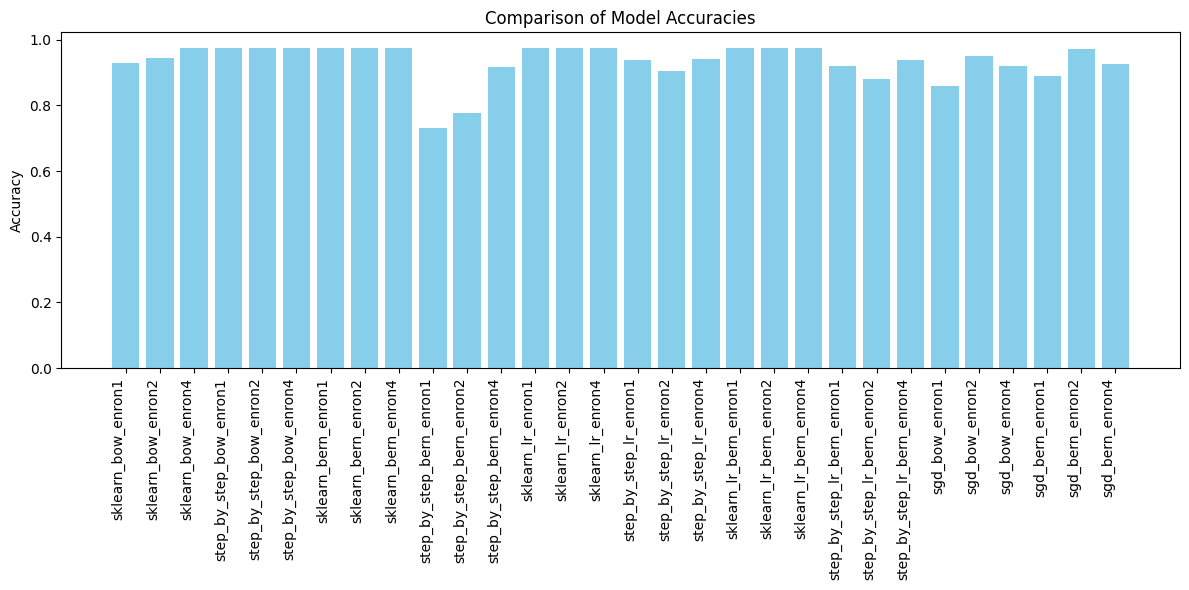

In [ ]:
import matplotlib.pyplot as plt
# Creating a bar plot
plt.figure(figsize=(12, 6))
plt.bar(all_results_accuracy.keys(), all_results_accuracy.values(), color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

plt.tight_layout()
plt.show()

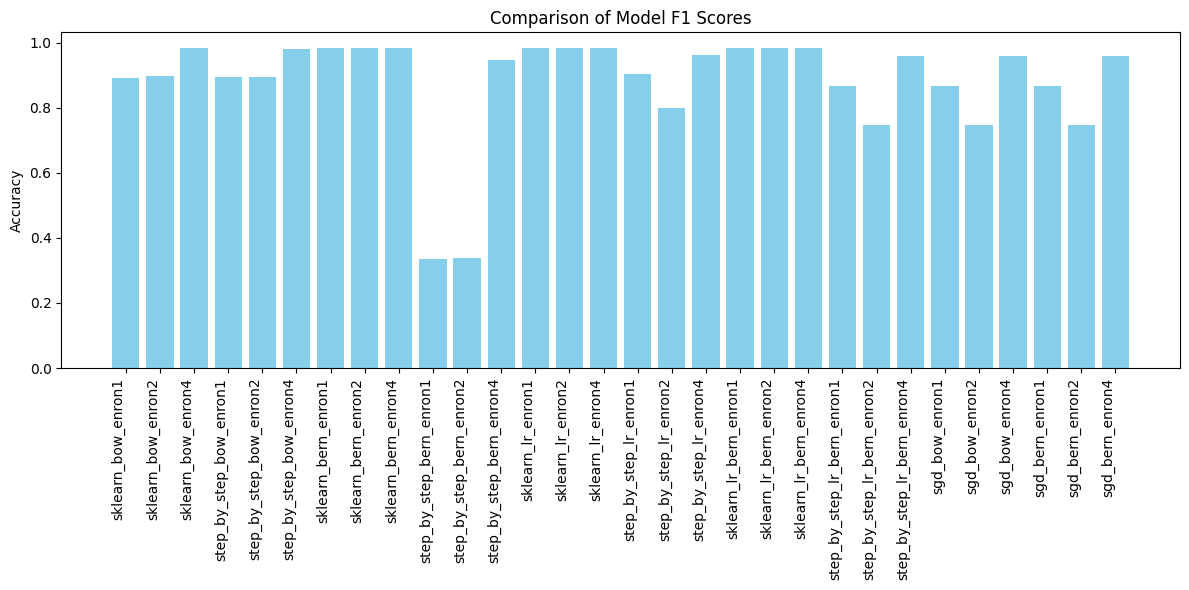

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(all_results_f1.keys(), all_results_f1.values(), color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Model F1 Scores')

plt.tight_layout()
plt.show()

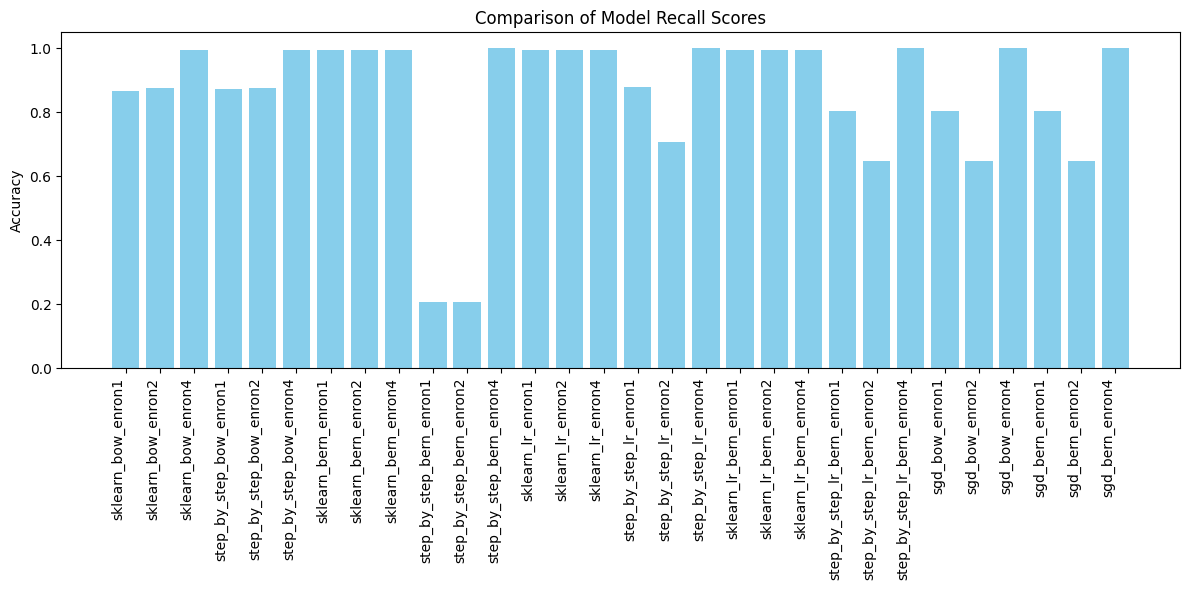

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(all_results_recall.keys(), all_results_recall.values(), color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Recall Scores')

plt.tight_layout()
plt.show()

In [ ]:
def calculate_precision(f1, recall):
    # To avoid division by zero, handle cases where 2 * recall - f1 is zero
    if 2 * recall - f1 == 0:
        return None
    return (f1 * recall) / (2 * recall - f1)

# Calculate precision for each model
precision_dict = {}

for model in all_results_f1:
    f1 = all_results_f1[model]
    recall = all_results_recall.get(model, None)  # Get recall for the same model
    if recall is not None:
        precision_dict[model] = calculate_precision(f1, recall)

# Print the calculated precision
print(precision_dict)

{'sklearn_bow_enron1': 0.9148936170212766, 'sklearn_bow_enron2': 0.919354838709677, 'sklearn_bow_enron4': 0.9700748129675809, 'step_by_step_bow_enron1': 0.9154929577464788, 'step_by_step_bow_enron2': 0.912, 'step_by_step_bow_enron4': 0.9676616915422884, 'sklearn_bern_enron1': 0.9700748129675809, 'sklearn_bern_enron2': 0.9700748129675809, 'sklearn_bern_enron4': 0.9700748129675809, 'step_by_step_bern_enron1': 0.8611111111111105, 'step_by_step_bern_enron2': 0.9, 'step_by_step_bern_enron4': 0.8967889908256881, 'sklearn_lr_enron1': 0.9700748129675809, 'sklearn_lr_enron2': 0.9700748129675809, 'sklearn_lr_enron4': 0.9700748129675809, 'step_by_step_lr_enron1': 0.9290780141843971, 'step_by_step_lr_enron2': 0.92, 'step_by_step_lr_enron4': 0.9265402843601894, 'sklearn_lr_bern_enron1': 0.9700748129675809, 'sklearn_lr_bern_enron2': 0.9700748129675809, 'sklearn_lr_bern_enron4': 0.9700748129675809, 'step_by_step_lr_bern_enron1': 0.9375, 'step_by_step_lr_bern_enron2': 0.8842105263157892, 'step_by_step

In [ ]:
best_recall_combination = max(all_results_recall, key=all_results_recall.get)
best_f1_combination = max(all_results_f1, key=all_results_f1.get)
best_accuracy_combination = max(all_results_accuracy, key=all_results_accuracy.get)
best_precision_combination = max(precision_dict, key=precision_dict.get)

print(f"Best Recall Combination: {best_recall_combination}")
print(f"Best F1 Combination: {best_f1_combination}")
print(f"Best Accuracy Combination: {best_accuracy_combination}")
print(f"Best Precision Combination: {best_precision_combination}")

Best Recall Combination: step_by_step_bern_enron4
Best F1 Combination: sklearn_bow_enron4
Best Accuracy Combination: sklearn_bow_enron4
Best Precision Combination: sklearn_bow_enron4


## Extracting Features

In [24]:
copy_of_enron1_train_df.head()

,Email,Type
0,"Subject: meter 5961 , dunagan , j . a . # 1\r\...",ham
1,Subject: hr performance objectives binders\r\n...,ham
2,Subject: mitchell gas services 2 / 00\r\n- - -...,ham
3,Subject: tenaska iv 1 / 01\r\nwe need to chang...,ham
4,"Subject: f . o . m . hpl nom . eff . may 1 , 2...",ham


In [25]:
# can add a regex for identifying wrong url
def extract_features(email):

    words = word_tokenize(email)

    # number of words
    word_count = len(email.split(" "))

    # average word length
    avg_word_length = np.mean([len(word) for word in words]) if word_count > 0 else 0

    # part of speech tags
    pos_tags = pos_tag(words)
    num_nouns = len([word for word, pos in pos_tags if pos.startswith('NN')])
    num_verbs = len([word for word, pos in pos_tags if pos.startswith('VB')])
    num_adjectives = len([word for word, pos in pos_tags if pos.startswith('JJ')])

    # number of special characters
    sp_char = 0
    for char in email:
        if char in "!@#$%^&*()[]":
            sp_char+=1

    # number of uppercase characters
    nums = 0
    for char in email:
        if char.isnumeric():
            nums+=1

    return [int(word_count), avg_word_length, int(num_nouns), int(num_verbs), int(num_adjectives), int(sp_char), int(nums)]


feature_columns = ['word_count', 'avg_word_length', 'num_nouns', 'num_verbs', 'num_adjectives', 'sp_char', 'nums']

# Apply the function and create a new dataframe with the extracted features
copy_of_enron1_train_df[feature_columns] = copy_of_enron1_train_df['Email'].apply(lambda email: pd.Series(extract_features(email)))
copy_of_enron2_train_df[feature_columns] = copy_of_enron2_train_df['Email'].apply(lambda email: pd.Series(extract_features(email)))
copy_of_enron4_train_df[feature_columns] = copy_of_enron4_train_df['Email'].apply(lambda email: pd.Series(extract_features(email)))

copy_of_enron1_test_df[feature_columns] = copy_of_enron1_test_df['Email'].apply(lambda email: pd.Series(extract_features(email)))
copy_of_enron2_test_df[feature_columns] = copy_of_enron2_test_df['Email'].apply(lambda email: pd.Series(extract_features(email)))
copy_of_enron4_test_df[feature_columns] = copy_of_enron4_test_df['Email'].apply(lambda email: pd.Series(extract_features(email)))




In [26]:
copy_of_enron1_train_df.head()

,Email,Type,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums
0,"Subject: meter 5961 , dunagan , j . a . # 1\r\...",ham,61.0,3.029412,15.0,12.0,6.0,2.0,16.0
1,Subject: hr performance objectives binders\r\n...,ham,53.0,4.081967,15.0,14.0,2.0,2.0,5.0
2,Subject: mitchell gas services 2 / 00\r\n- - -...,ham,162.0,2.545977,49.0,11.0,9.0,3.0,45.0
3,Subject: tenaska iv 1 / 01\r\nwe need to chang...,ham,167.0,3.631868,42.0,31.0,6.0,2.0,51.0
4,"Subject: f . o . m . hpl nom . eff . may 1 , 2...",ham,282.0,2.656766,75.0,14.0,21.0,7.0,119.0


In [27]:
quantiles = [0,0.25,0.5,0.75,1.0]
dfs = [copy_of_enron1_train_df, copy_of_enron1_test_df, copy_of_enron2_train_df, copy_of_enron2_test_df, copy_of_enron4_train_df, copy_of_enron4_test_df]
def bin(col, df, quantiles):
    # Apply qcut and drop duplicate bin edges, without labels for now
    binned_feature = pd.qcut(df[col], q=quantiles, duplicates='drop')

    # Now generate dynamic labels based on the actual number of bins created
    n_bins = binned_feature.cat.categories.size  # Get the number of bins
    labels = ['Low', 'Medium', 'High', 'Very High'][:n_bins]  # Adjust labels accordingly

    # Reapply qcut with labels
    df[col] = pd.qcut(df[col], q=quantiles, labels=labels, duplicates='drop')

for df in dfs:
    for feature in feature_columns:
        bin(feature, df, quantiles)

In [28]:
copy_of_enron1_train_df

,Email,Type,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums
0,"Subject: meter 5961 , dunagan , j . a . # 1\r\...",ham,Medium,Medium,Medium,Medium,Medium,Medium,Medium
1,Subject: hr performance objectives binders\r\n...,ham,Medium,Very High,Medium,High,Low,Medium,Low
2,Subject: mitchell gas services 2 / 00\r\n- - -...,ham,High,Low,High,Medium,Medium,Medium,High
3,Subject: tenaska iv 1 / 01\r\nwe need to chang...,ham,High,High,High,Very High,Medium,Medium,Very High
4,"Subject: f . o . m . hpl nom . eff . may 1 , 2...",ham,Very High,Low,High,High,Very High,High,Very High
...,...,...,...,...,...,...,...,...,...
445,"Subject: hpl nom for may 23 , 2001\r\n( see at...",ham,Low,Low,Low,Low,Low,Medium,Medium
446,Subject: re : swing and buybacks\r\nthe buybac...,ham,Medium,High,Medium,Medium,Medium,Low,Medium
447,Subject: re : intrastate and 311 contracts for...,ham,Very High,High,Very High,Very High,Very High,Very High,Very High
448,"Subject: re : exxon company , usa global # 960...",ham,Very High,High,Very High,Very High,Very High,Very High,Very High


In [29]:
copy_of_enron1_train_df['Email_tok'] = copy_of_enron1_train_df['Email'].apply(preprocess)
copy_of_enron2_train_df['Email_tok'] = copy_of_enron2_train_df['Email'].apply(preprocess)
copy_of_enron4_train_df['Email_tok'] = copy_of_enron4_train_df['Email'].apply(preprocess)

copy_of_enron1_test_df['Email_tok'] = copy_of_enron1_test_df['Email'].apply(preprocess)
copy_of_enron2_test_df['Email_tok'] = copy_of_enron2_test_df['Email'].apply(preprocess)
copy_of_enron4_test_df['Email_tok'] = copy_of_enron4_test_df['Email'].apply(preprocess)

copy_of_enron1_train_df['Email_str'] = copy_of_enron1_train_df['Email_tok'].apply(lambda x: ' '.join(x))
copy_of_enron2_train_df['Email_str'] = copy_of_enron2_train_df['Email_tok'].apply(lambda x: ' '.join(x))
copy_of_enron4_train_df['Email_str'] = copy_of_enron4_train_df['Email_tok'].apply(lambda x: ' '.join(x))

copy_of_enron1_test_df['Email_str'] = copy_of_enron1_test_df['Email_tok'].apply(lambda x: ' '.join(x))
copy_of_enron2_test_df['Email_str'] = copy_of_enron2_test_df['Email_tok'].apply(lambda x: ' '.join(x))
copy_of_enron4_test_df['Email_str'] = copy_of_enron4_test_df['Email_tok'].apply(lambda x: ' '.join(x))

In [30]:
copy_of_enron1_train_df.head()

,Email,Type,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums,Email_tok,Email_str
0,"Subject: meter 5961 , dunagan , j . a . # 1\r\...",ham,Medium,Medium,Medium,Medium,Medium,Medium,Medium,"[subject, meter, dunagan, j, daren, informed, ...",subject meter dunagan j daren informed meter d...
1,Subject: hr performance objectives binders\r\n...,ham,Medium,Very High,Medium,High,Low,Medium,Low,"[subject, hr, performance, objective, binder, ...",subject hr performance objective binder good m...
2,Subject: mitchell gas services 2 / 00\r\n- - -...,ham,High,Low,High,Medium,Medium,Medium,High,"[subject, mitchell, gas, service, forwarded, j...",subject mitchell gas service forwarded julie m...
3,Subject: tenaska iv 1 / 01\r\nwe need to chang...,ham,High,High,High,Very High,Medium,Medium,Very High,"[subject, tenaska, iv, need, change, demand, f...",subject tenaska iv need change demand fee tena...
4,"Subject: f . o . m . hpl nom . eff . may 1 , 2...",ham,Very High,Low,High,High,Very High,High,Very High,"[subject, f, hpl, nom, eff, may, nomination, m...",subject f hpl nom eff may nomination may avail...


In [31]:
le = LabelEncoder()
for col in feature_columns:
    copy_of_enron1_train_df[col] = le.fit_transform(copy_of_enron1_train_df[col])
    copy_of_enron2_train_df[col] = le.fit_transform(copy_of_enron2_train_df[col])
    copy_of_enron4_train_df[col] = le.fit_transform(copy_of_enron4_train_df[col])

    copy_of_enron1_test_df[col] = le.fit_transform(copy_of_enron1_test_df[col])
    copy_of_enron2_test_df[col] = le.fit_transform(copy_of_enron2_test_df[col])
    copy_of_enron4_test_df[col] = le.fit_transform(copy_of_enron4_test_df[col])

copy_of_enron1_train_df.head()

,Email,Type,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums,Email_tok,Email_str
0,"Subject: meter 5961 , dunagan , j . a . # 1\r\...",ham,2,2,2,2,2,2,2,"[subject, meter, dunagan, j, daren, informed, ...",subject meter dunagan j daren informed meter d...
1,Subject: hr performance objectives binders\r\n...,ham,2,3,2,0,1,2,1,"[subject, hr, performance, objective, binder, ...",subject hr performance objective binder good m...
2,Subject: mitchell gas services 2 / 00\r\n- - -...,ham,0,1,0,2,2,2,0,"[subject, mitchell, gas, service, forwarded, j...",subject mitchell gas service forwarded julie m...
3,Subject: tenaska iv 1 / 01\r\nwe need to chang...,ham,0,0,0,3,2,2,3,"[subject, tenaska, iv, need, change, demand, f...",subject tenaska iv need change demand fee tena...
4,"Subject: f . o . m . hpl nom . eff . may 1 , 2...",ham,3,1,0,0,3,0,3,"[subject, f, hpl, nom, eff, may, nomination, m...",subject f hpl nom eff may nomination may avail...


In [32]:
X = feature_columns+['Email_str', 'Email_tok']
y = ['Type']

copy_of_enron1_train_df[X].head()

,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums,Email_str,Email_tok
0,2,2,2,2,2,2,2,subject meter dunagan j daren informed meter d...,"[subject, meter, dunagan, j, daren, informed, ..."
1,2,3,2,0,1,2,1,subject hr performance objective binder good m...,"[subject, hr, performance, objective, binder, ..."
2,0,1,0,2,2,2,0,subject mitchell gas service forwarded julie m...,"[subject, mitchell, gas, service, forwarded, j..."
3,0,0,0,3,2,2,3,subject tenaska iv need change demand fee tena...,"[subject, tenaska, iv, need, change, demand, f..."
4,3,1,0,0,3,0,3,subject f hpl nom eff may nomination may avail...,"[subject, f, hpl, nom, eff, may, nomination, m..."


In [33]:
new_results_acc = {}
new_results_f1 = {}
new_results_recall = {}

### Multinomial NB BoW

In [56]:
from scipy.sparse import hstack
def predict_type(X_train, X_test, name, feature_columns):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']

    vectorizer = CountVectorizer()

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])
    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values


    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    model = MultinomialNB(alpha=1.0)
    model.fit(X_train_combined, y_train)

    y_pred = model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")


predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1', feature_columns)
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2', feature_columns)
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4', feature_columns)

# enron1 - 0.9298245614035088 enron2 - 0.9435146443514645 enron4 - 0.9742173112338858

(450, 8238) (456, 8238)
(450, 8245) (456, 8245)
enron1
accuracy - 0.9210526315789473
recall - 0.8389261744966443
f1 score - 0.8741258741258742
              precision    recall  f1-score   support

         ham       0.92      0.96      0.94       307
        spam       0.91      0.84      0.87       149

    accuracy                           0.92       456
   macro avg       0.92      0.90      0.91       456
weighted avg       0.92      0.92      0.92       456

----------------------------------------------------------------------------------
(463, 8469) (478, 8469)
(463, 8476) (478, 8476)
enron2
accuracy - 0.9309623430962343
recall - 0.823076923076923
f1 score - 0.8663967611336032
              precision    recall  f1-score   support

         ham       0.94      0.97      0.95       348
        spam       0.91      0.82      0.87       130

    accuracy                           0.93       478
   macro avg       0.93      0.90      0.91       478
weighted avg       0.93      0.93

### Bernoulli NB

In [43]:
from scipy.sparse import hstack
def predict_type(X_train, X_test, name, feature_columns):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']

    vectorizer = CountVectorizer(binary=True)

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])
    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values


    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    model = BernoulliNB(alpha=1.0)
    model.fit(X_train_combined, y_train)

    y_pred = model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")


predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1', feature_columns)
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2', feature_columns)
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4', feature_columns)

# enron1 - 0.9298245614035088 enron2 - 0.9435146443514645 enron4 - 0.9742173112338858

(450, 8238) (456, 8238)
(450, 8245) (456, 8245)
enron1
accuracy - 0.7302631578947368
recall - 0.2080536912751678
f1 score - 0.3351351351351351
              precision    recall  f1-score   support

         ham       0.72      0.98      0.83       307
        spam       0.86      0.21      0.34       149

    accuracy                           0.73       456
   macro avg       0.79      0.60      0.58       456
weighted avg       0.77      0.73      0.67       456

----------------------------------------------------------------------------------
(463, 8469) (478, 8469)
(463, 8476) (478, 8476)
enron2
accuracy - 0.7782426778242678
recall - 0.2076923076923077
f1 score - 0.3375
              precision    recall  f1-score   support

         ham       0.77      0.99      0.87       348
        spam       0.90      0.21      0.34       130

    accuracy                           0.78       478
   macro avg       0.84      0.60      0.60       478
weighted avg       0.81      0.78      0.72 

### LR BoW

In [44]:
def predict_type(X_train, X_test, name):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values

    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, random_state=42, test_size=0.3)

    model = LogisticRegression()
    lambda_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
    grid_search = GridSearchCV(model, lambda_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    new_model = LogisticRegression(C=best_C)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_pred = new_model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")

predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1')
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2')
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4')

(450, 8238) (456, 8238)
(450, 8245) (456, 8245)
enron1
accuracy - 0.9495614035087719
recall - 0.959731543624161
f1 score - 0.9255663430420711
              precision    recall  f1-score   support

         ham       0.98      0.94      0.96       307
        spam       0.89      0.96      0.93       149

    accuracy                           0.95       456
   macro avg       0.94      0.95      0.94       456
weighted avg       0.95      0.95      0.95       456

----------------------------------------------------------------------------------
(463, 8469) (478, 8469)
(463, 8476) (478, 8476)
enron2
accuracy - 0.9539748953974896
recall - 0.9153846153846154
f1 score - 0.9153846153846154
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       348
        spam       0.92      0.92      0.92       130

    accuracy                           0.95       478
   macro avg       0.94      0.94      0.94       478
weighted avg       0.95      0.95

### LR Bernoulli

In [45]:
def predict_type(X_train, X_test, name):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(binary=True)

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values

    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, random_state=42, test_size=0.3)

    model = LogisticRegression()
    lambda_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
    grid_search = GridSearchCV(model, lambda_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    new_model = LogisticRegression(C=best_C)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_pred = new_model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")

predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1')
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2')
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4')

(450, 8238) (456, 8238)
(450, 8245) (456, 8245)
enron1
accuracy - 0.9583333333333334
recall - 0.9328859060402684
f1 score - 0.936026936026936
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       307
        spam       0.94      0.93      0.94       149

    accuracy                           0.96       456
   macro avg       0.95      0.95      0.95       456
weighted avg       0.96      0.96      0.96       456

----------------------------------------------------------------------------------
(463, 8469) (478, 8469)
(463, 8476) (478, 8476)
enron2
accuracy - 0.9476987447698745
recall - 0.8769230769230769
f1 score - 0.9011857707509882
              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       348
        spam       0.93      0.88      0.90       130

    accuracy                           0.95       478
   macro avg       0.94      0.93      0.93       478
weighted avg       0.95      0.95

### SGDClassifier BoW

In [54]:
enron1_best_params = {'alpha': 0.001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.2, 'warm_start': False}
enron2_best_params = {'alpha': 0.01, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 800, 'penalty': 'l2', 'validation_fraction': 0.3, 'warm_start': True}
enron4_best_params = {'alpha': 0.0001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.3, 'warm_start': True}

def predict_type(X_train, X_test, name, best_params):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values

    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, random_state=42, test_size=0.3)

    model = SGDClassifier(**best_params)

    model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_pred = model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")


predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1', enron1_best_params)
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2', enron2_best_params)
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4', enron4_best_params)

(450, 8238) (456, 8238)
(450, 8245) (456, 8245)
enron1
accuracy - 0.9057017543859649
recall - 0.8859060402684564
f1 score - 0.8599348534201955
              precision    recall  f1-score   support

         ham       0.94      0.92      0.93       307
        spam       0.84      0.89      0.86       149

    accuracy                           0.91       456
   macro avg       0.89      0.90      0.89       456
weighted avg       0.91      0.91      0.91       456

----------------------------------------------------------------------------------
(463, 8469) (478, 8469)
(463, 8476) (478, 8476)
enron2
accuracy - 0.9518828451882845
recall - 0.9461538461538461
f1 score - 0.9144981412639406
              precision    recall  f1-score   support

         ham       0.98      0.95      0.97       348
        spam       0.88      0.95      0.91       130

    accuracy                           0.95       478
   macro avg       0.93      0.95      0.94       478
weighted avg       0.95      0.9

### SGDClassifier Bernoulli

In [55]:
enron1_best_params = {'alpha': 0.001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.2, 'warm_start': False}
enron2_best_params = {'alpha': 0.01, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 800, 'penalty': 'l2', 'validation_fraction': 0.3, 'warm_start': True}
enron4_best_params = {'alpha': 0.0001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.3, 'warm_start': True}

def predict_type(X_train, X_test, name, best_params):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(binary=True)

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values

    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, random_state=42, test_size=0.3)

    model = SGDClassifier(**best_params)

    model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_pred = model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")


predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1', enron1_best_params)
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2', enron2_best_params)
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4', enron4_best_params)

(450, 8238) (456, 8238)
(450, 8245) (456, 8245)
enron1
accuracy - 0.9254385964912281
recall - 0.8926174496644296
f1 score - 0.8866666666666666
              precision    recall  f1-score   support

         ham       0.95      0.94      0.94       307
        spam       0.88      0.89      0.89       149

    accuracy                           0.93       456
   macro avg       0.91      0.92      0.92       456
weighted avg       0.93      0.93      0.93       456

----------------------------------------------------------------------------------
(463, 8469) (478, 8469)
(463, 8476) (478, 8476)
enron2
accuracy - 0.9372384937238494
recall - 0.823076923076923
f1 score - 0.8770491803278688
              precision    recall  f1-score   support

         ham       0.94      0.98      0.96       348
        spam       0.94      0.82      0.88       130

    accuracy                           0.94       478
   macro avg       0.94      0.90      0.92       478
weighted avg       0.94      0.94